In [1]:
import sympy
sympy.init_printing()

Valve equation
==========

Let's linearise the nasty nonlinear term in the equation percentage valve relationship in T3 Problem 5 (or T2 problem 4)

$$ F = C_v \alpha^{x - 1} $$

First we introduce the requisite symbols

In [2]:
F, C_v, alpha, x = sympy.symbols('F, C_v, alpha, x')

In [3]:
eq = F - C_v*alpha**(x - 1)
eq

We also introduce "barred" versions of the variables. I'm using $\LaTeX$ notation here to make the typesetting pretty, but you can just use `xbar` as the name as well. Note that I am using "raw strings" that start with an `r` so that the backslash is not interpreted as an [escape character](https://en.wikipedia.org/wiki/Escape_character).

In [4]:
Fbar, xbar = sympy.symbols(r'\bar{F}, \bar{x}')

For single variable expressions, we can use `sympy.series` to linearise for us. Note that he help for `sympy.series` references the help for `sympy.Expr.series`, which has a lot more detail about the operation of this function

In [5]:
sympy.series?

In [6]:
sympy.Expr.series?

Calling series by itself will result in an error term (the one with an $\mathcal{O}$). This is useful to estimate the error of the approximation.

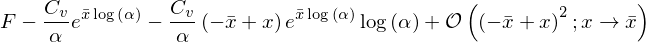

In [7]:
sympy.series(eq, x, xbar, 2)

But mostly we will be interested in the expression rather than the error, so we will remove that term with the `removeO` method:

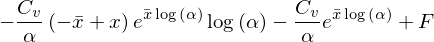

In [8]:
lineq = sympy.series(eq, x, xbar, 2).removeO()
lineq

Rewriting in terms of devation variables
--------------

While we are here, we can also rewrite in terms of deviation variables:

In [9]:
xprime, Fprime = sympy.symbols("x', F'")

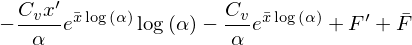

In [10]:
lineq_deviation = lineq.subs({x: xprime + xbar, 
                              F: Fprime + Fbar})
lineq_deviation

We can use the knowledge about the relationship betwee $\bar{x}$ and $\bar{F}$ to simplify a little more:

In [11]:
steady = eq.subs({x: xbar, F: Fbar})

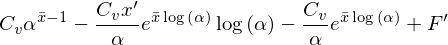

In [12]:
simplified = lineq_deviation - steady
simplified

We can solve this equation for $x'$, ready to substitute into the next equation.

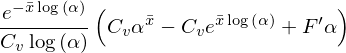

In [13]:
sympy.solve(simplified, xprime)[0]

Multiple variables
---------------

Unfortunately, SymPy doesn't have a built-in function for multivariate Taylor series, and consecutive application of the `series` function doesn't do exactly what we want.

In [14]:
variables = x, y, z = sympy.symbols('x, y, z')
bars = xbar, ybar, zbar = sympy.symbols(r'\bar{x}, \bar{y}, \bar{z}')

In [15]:
eq = x*y*z

Note that the other variables are assumed to be constant here, so we don't recover the answer we are looking for.

In [16]:
eq.series(x, xbar, 2).removeO().series(y, ybar, 2).removeO()

This function applies the rule basically as it is written in the textbook:

In [17]:
def linearise(eq, variables, bars):
    vars_and_bars = list(zip(variables, bars))
    # This is the constant term
    result = eq.subs(vars_and_bars)
    # now, we take the derivative with respect to each variable, evaluated at the steady state:
    for variable, bar in vars_and_bars:
        result += (variable - bar)*eq.diff(variable).subs(vars_and_bars)
    return result

In [18]:
linearise(eq, variables, bars)